In [712]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
from scipy import stats

In [713]:
pd.options.display.float_format = '{:,.2f}'.format

In [719]:
data = pd.read_csv('Results of sims/Sims/200614_offload_alldata.csv', index_col = 0)

In [720]:
data['Offload'] = data['Offload'].replace('0.25', 0.25)

In [721]:
data['Offload'] = pd.Categorical(data['Offload'])
data['Offload'] = data['Offload'].cat.set_categories(['Control', 0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30], ordered=True)

In [722]:
data.shape

(240000, 44)

In [723]:
data.groupby(['Staffing', 'Offload']).size()

Staffing  Offload
10-20-9   Control    10000
          0.0        10000
          0.05       10000
          0.1        10000
          0.15       10000
          0.2         6608
          0.25       10000
          0.3        10000
10-21-9   Control    10000
          0.0        10000
          0.05       10000
          0.1        10000
          0.15       10000
          0.2        10000
          0.25       10000
          0.3        10000
10-22-9   Control    10000
          0.0        10000
          0.05       10000
          0.1        10000
          0.15       10000
          0.2        10000
          0.25       10000
          0.3        10000
dtype: int64

In [724]:
cols_groupby = ['Mean_flowstaff_utilization', 'Mean_flowstaff_waiting', 'Total_wait_time']

In [725]:
data.groupby(['Offload', 'Staffing'])[cols_groupby].quantile([0.05, 0.5, 0.95])

Mean_flowstaff_utilization  Mean_flowstaff_waiting  \
Offload Staffing                                                            
Control 10-20-9  0.05                         nan                     nan   
                 0.50                         nan                     nan   
                 0.95                         nan                     nan   
        10-21-9  0.05                         nan                     nan   
                 0.50                         nan                     nan   
                 0.95                         nan                     nan   
        10-22-9  0.05                         nan                     nan   
                 0.50                         nan                     nan   
                 0.95                         nan                     nan   
0.0     10-20-9  0.05                       13.72                    0.23   
                 0.50                       14.34                    0.24   
                 0.95                       14.92                    0.26   
        10-21-9  0.05                       13.78                    0.23   
                 0.50                       14.40                    0.25   
                 0.95                       15.01                    0.26   
        10-22-9  0.05                       13.78                    0.23   
                 0.50                       14.43                    0.25   
                 0.95                       15.06                    0.26   
0.05    10-20-9  0.05                       13.80                    0.23   
                 0.50                       14.44                    0.25   
                 0.95                       15.04                    0.26   
        10-21-9  0.05                       13.86                    0.24   
                 0.50                       14.51                    0.25   
                 0.95                       15.12                    0.26   
        10-22-9  0.05                       13.91                    0.24   
                 0.50                       14.55                    0.25   
                 0.95                       15.16                    0.26   
0.1     10-20-9  0.05                       13.89                    0.24   
                 0.50                       14.55                    0.25   
                 0.95                       15.17                    0.26   
...                                           ...                     ...   
0.15    10-22-9  0.05                       14.09                    0.24   
                 0.50                       14.81                    0.25   
                 0.95                       15.47                    0.26   
0.2     10-20-9  0.05                       13.99                    0.24   
                 0.50                       14.68                    0.25   
                 0.95                       15.33                    0.26   
        10-21-9  0.05                       14.07                    0.24   
                 0.50                       14.80                    0.25   
                 0.95                       15.46                    0.26   
        10-22-9  0.05                       14.11                    0.24   
                 0.50                       14.86                    0.25   
                 0.95                       15.56                    0.26   
0.25    10-20-9  0.05                       14.00                    0.24   
                 0.50                       14.74                    0.25   
                 0.95                       15.38                    0.26   
        10-21-9  0.05                       14.10                    0.24   
                 0.50                       14.83                    0.25   
                 0.95                       15.53                    0.26   
        10-22-9  0.05                       14.12                    0.24   
                 0.

In [726]:
fs_steps = ['Mean_wait_time_refine_complaint', 'Mean_serve_time_refine_complaint', 'Mean_wait_time_exam', 'Mean_serve_time_exam', 'Mean_serve_time_exam_flow_staff', 'Mean_wait_time_follow_up', 'Mean_serve_time_follow_up']

In [728]:
df_fs_steps = data.groupby(['Offload', 'Staffing'])[fs_steps].mean()

In [730]:
df_fs_steps.columns = ['RC_Wait', 'RC_Serve', 'EX_Wait', 'EX_Serve_Doc', 'EX_Serve_FS', 'FU_Wait', 'FU_Serve']

In [733]:
df_fs_steps['FS_All_Wait'] = df_fs_steps[['RC_Wait', 'EX_Wait', 'FU_Wait']].sum(axis = 1)

In [734]:
df_fs_steps

RC_Wait  RC_Serve  EX_Wait  EX_Serve_Doc  EX_Serve_FS  \
Offload Staffing                                                          
Control 10-20-9      0.00     24.67     9.04         29.08          nan   
        10-21-9      0.00     24.67     8.88         29.04          nan   
        10-22-9      0.00     24.66     8.89         29.05          nan   
0.0     10-20-9      5.55     24.50     4.56         29.04        29.04   
        10-21-9      3.84     24.54     5.61         29.06        29.06   
        10-22-9      2.56     24.56     6.53         29.04        29.04   
0.05    10-20-9      4.83     24.50     3.65         28.16        29.05   
        10-21-9      3.15     24.54     4.48         28.17        29.06   
        10-22-9      1.99     24.57     5.24         28.18        29.07   
0.1     10-20-9      3.92     24.53     2.41         26.60        29.03   
        10-21-9      2.32     24.55     2.92         26.61        29.04   
        10-22-9      1.33     24.59     3.37         26.62        29.06   
0.15    10-20-9      3.32     24.53     1.58         25.16        29.07   
        10-21-9      1.79     24.56     1.86         25.15        29.06   
        10-22-9      0.91     24.60     2.10         25.15        29.07   
0.2     10-20-9      2.87     24.51     0.98         23.58        29.05   
        10-21-9      1.46     24.58     1.12         23.60        29.07   
        10-22-9      0.68     24.60     1.24         23.61        29.09   
0.25    10-20-9      2.64     24.53     0.61         22.23        29.06   
        10-21-9      1.27     24.58     0.69         22.22        29.06   
        10-22-9      0.55     24.62     0.74         22.22        29.06   
0.3     10-20-9      2.49     24.55     0.37         20.81        29.06   
        10-21-9      1.13     24.58     0.40         20.81        29.06   
        10-22-9      0.48     24.62     0.42         20.81        29.07   

                  FU_Wait  FU_Serve  FS_All_Wait  
Offload Staffing                                  
Control 10-20-9      0.00      5.24         9.04  
        10-21-9      0.00      5.24         8.88  
        10-22-9      0.00      5.25         8.89  
0.0     10-20-9      0.00      5.24        10.11  
        10-21-9      0.00      5.24         9.44  
        10-22-9      0.00      5.24         9.09  
0.05    10-20-9      0.00      5.25         8.48  
        10-21-9      0.00      5.25         7.63  
        10-22-9      0.00      5.25         7.23  
0.1     10-20-9      0.00      5.25         6.33  
        10-21-9      0.00      5.24         5.25  
        10-22-9      0.00      5.24         4.70  
0.15    10-20-9      0.00      5.25         4.90  
        10-21-9      0.00      5.24         3.65  
        10-22-9      0.00      5.24         3.01  
0.2     10-20-9      0.00      5.24         3.85  
        10-21-9      0.00      5.24         2.59  
        10-22-9      0.00      5.24         1.92  
0.25    10-20-9      0.00      5.25         3.26  
        10-21-9      0.00      5.25         1.96  
        10-22-9      0.00      5.25         1.28  
0.3     10-20-9      0.00      5.25         2.85  
        10-21-9      0.00      5.25         1.54  
        10-22-9      0.00      5.24         0.91

In [735]:
data.groupby(['Staffing', 'Offload'])[fs_steps].mean().T

Staffing                         10-20-9                                      \
Offload                          Control   0.0  0.05   0.1  0.15   0.2  0.25   
Mean_wait_time_refine_complaint     0.00  5.55  4.83  3.92  3.32  2.87  2.64   
Mean_serve_time_refine_complaint   24.67 24.50 24.50 24.53 24.53 24.51 24.53   
Mean_wait_time_exam                 9.04  4.56  3.65  2.41  1.58  0.98  0.61   
Mean_serve_time_exam               29.08 29.04 28.16 26.60 25.16 23.58 22.23   
Mean_serve_time_exam_flow_staff      nan 29.04 29.05 29.03 29.07 29.05 29.06   
Mean_wait_time_follow_up            0.00  0.00  0.00  0.00  0.00  0.00  0.00   
Mean_serve_time_follow_up           5.24  5.24  5.25  5.25  5.25  5.24  5.25   

Staffing                               10-21-9        ...             10-22-9  \
Offload                            0.3 Control   0.0  ...  0.25   0.3 Control   
Mean_wait_time_refine_complaint   2.49    0.00  3.84  ...  1.27  1.13    0.00   
Mean_serve_time_refine_complaint 24.55   24.67 24.54  ... 24.58 24.58   24.66   
Mean_wait_time_exam               0.37    8.88  5.61  ...  0.69  0.40    8.89   
Mean_serve_time_exam             20.81   29.04 29.06  ... 22.22 20.81   29.05   
Mean_serve_time_exam_flow_staff  29.06     nan 29.06  ... 29.06 29.06     nan   
Mean_wait_time_follow_up          0.00    0.00  0.00  ...  0.00  0.00    0.00   
Mean_serve_time_follow_up         5.25    5.24  5.24  ...  5.25  5.25    5.25   

Staffing                                                                    
Offload                            0.0  0.05   0.1  0.15   0.2  0.25   0.3  
Mean_wait_time_refine_complaint   2.56  1.99  1.33  0.91  0.68  0.55  0.48  
Mean_serve_time_refine_complaint 24.56 24.57 24.59 24.60 24.60 24.62 24.62  
Mean_wait_time_exam               6.53  5.24  3.37  2.10  1.24  0.74  0.42  
Mean_serve_time_exam             29.04 28.18 26.62 25.15 23.61 22.22 20.81  
Mean_serve_time_exam_flow_staff  29.04 29.07 29.06 29.07 29.09 29.06 29.07  
Mean_wait_time_follow_up          0.00  0.00  0.00  0.00  0.00  0.00  0.00  
Mean_serve_time_follow_up         5.24  5.25  5.24  5.24  5.24  5.25  5.24  

[7 rows x 24 columns]

In [736]:
data.groupby(['Offload', 'Staffing'])[fs_steps].quantile([0.05, 0.95]).T

Offload                          Control                                    \
Staffing                         10-20-9       10-21-9       10-22-9         
                                    0.05  0.95    0.05  0.95    0.05  0.95   
Mean_wait_time_refine_complaint     0.00  0.00    0.00  0.00    0.00  0.00   
Mean_serve_time_refine_complaint   23.42 25.97   23.43 25.94   23.42 25.93   
Mean_wait_time_exam                 3.77 15.80    3.75 15.56    3.69 15.69   
Mean_serve_time_exam               27.04 31.21   26.99 31.14   27.01 31.19   
Mean_serve_time_exam_flow_staff      nan   nan     nan   nan     nan   nan   
Mean_wait_time_follow_up            0.00  0.00    0.00  0.00    0.00  0.00   
Mean_serve_time_follow_up           4.92  5.57    4.93  5.57    4.92  5.57   

Offload                              0.0                      ...    0.25  \
Staffing                         10-20-9       10-21-9        ... 10-21-9   
                                    0.05  0.95    0.05  0.95  ...    0.05   
Mean_wait_time_refine_complaint     1.85 10.44    0.84  8.16  ...    0.30   
Mean_serve_time_refine_complaint   23.27 25.77   23.29 25.83  ...   23.36   
Mean_wait_time_exam                 2.62  6.68    3.09  8.22  ...    0.20   
Mean_serve_time_exam               26.99 31.16   27.01 31.16  ...   20.68   
Mean_serve_time_exam_flow_staff    26.99 31.16   27.01 31.16  ...   26.99   
Mean_wait_time_follow_up            0.00  0.00    0.00  0.00  ...    0.00   
Mean_serve_time_follow_up           4.91  5.57    4.92  5.58  ...    4.93   

Offload                                                  0.3                \
Staffing                               10-22-9       10-20-9       10-21-9   
                                  0.95    0.05  0.95    0.05  0.95    0.05   
Mean_wait_time_refine_complaint   2.94    0.06  1.51    0.85  4.90    0.27   
Mean_serve_time_refine_complaint 25.84   23.37 25.91   23.30 25.84   23.35   
Mean_wait_time_exam               1.39    0.21  1.51    0.08  0.82    0.09   
Mean_serve_time_exam             23.79   20.69 23.80   19.35 22.27   19.36   
Mean_serve_time_exam_flow_staff  31.16   26.99 31.17   26.98 31.16   27.01   
Mean_wait_time_follow_up          0.00    0.00  0.00    0.00  0.00    0.00   
Mean_serve_time_follow_up         5.58    4.93  5.57    4.93  5.57    4.93   

Offload                                               
Staffing                               10-22-9        
                                  0.95    0.05  0.95  
Mean_wait_time_refine_complaint   2.58    0.06  1.28  
Mean_serve_time_refine_complaint 25.85   23.37 25.90  
Mean_wait_time_exam               0.89    0.09  0.95  
Mean_serve_time_exam             22.28   19.37 22.28  
Mean_serve_time_exam_flow_staff  31.16   27.01 31.17  
Mean_wait_time_follow_up          0.00    0.00  0.00  
Mean_serve_time_follow_up         5.58    4.92  5.57  

[7 rows x 48 columns]

In [745]:
df_staffing_10209 = data[data['Staffing'] == '10-20-9']
df_staffing_10219 = data[data['Staffing'] == '10-21-9']
df_staffing_10229 = data[data['Staffing'] == '10-22-9']

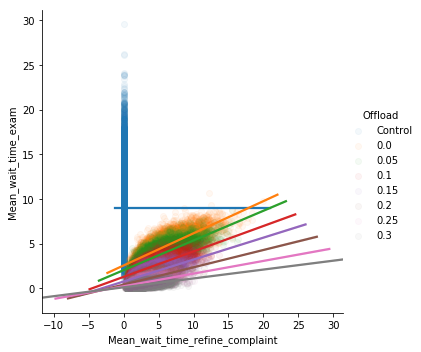

In [741]:
sns.lmplot(data = df_staffing_10209, x = 'Mean_wait_time_refine_complaint', y = 'Mean_wait_time_exam', hue = 'Offload', scatter_kws = {'alpha': 0.05})

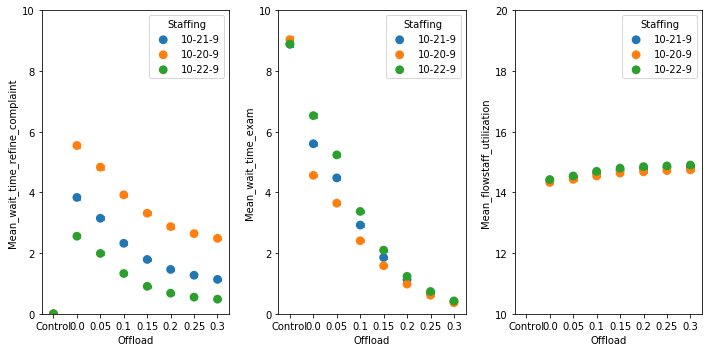

In [742]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (10, 5))
sns.pointplot(data = data, x = 'Offload', y = 'Mean_wait_time_refine_complaint', hue = 'Staffing', ci = 95, capsize = 0.2, join = False, ax = ax1)
sns.pointplot(data = data, x = 'Offload', y = 'Mean_wait_time_exam', hue = 'Staffing', ci = 95, capsize = 0.2, join = False, ax = ax2)
sns.pointplot(data = data, x = 'Offload', y = 'Mean_flowstaff_utilization', hue = 'Staffing', ci = 95, capsize = 0.2, join = False, ax = ax3)
ax1.set_ylim(0, 10)
ax2.set_ylim(0, 10)
ax3.set_ylim(10, 20)
plt.tight_layout()
plt.show()

(0, 6)

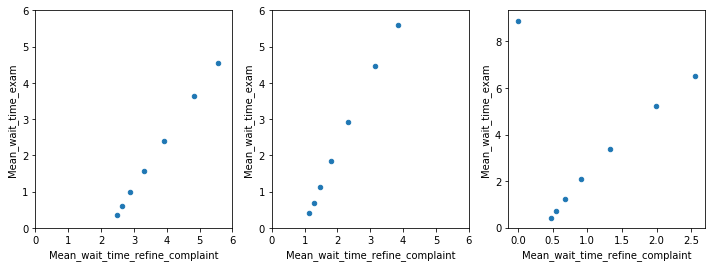

In [746]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (12, 4))
df_staffing_10209.groupby('Offload')[fs_steps].mean().plot.scatter(x = 'Mean_wait_time_refine_complaint', y = 'Mean_wait_time_exam', ax = ax1)
df_staffing_10219.groupby('Offload')[fs_steps].mean().plot.scatter(x = 'Mean_wait_time_refine_complaint', y = 'Mean_wait_time_exam', ax = ax2)
df_staffing_10229.groupby('Offload')[fs_steps].mean().plot.scatter(x = 'Mean_wait_time_refine_complaint', y = 'Mean_wait_time_exam', ax = ax3)
ax1.set_xlim(0, 6)
ax1.set_ylim(0, 6)
ax2.set_xlim(0, 6)
ax2.set_ylim(0, 6)

In [747]:
fs_work_time = ['Mean_wait_time_refine_complaint', 'Mean_serve_time_refine_complaint', 'Mean_wait_time_exam', 'Mean_serve_time_exam_flow_staff', 'Mean_serve_time_follow_up']

In [748]:
fs_workpath = data.groupby(['Offload', 'Staffing'])[fs_work_time].mean()

In [749]:
fs_workpath.columns = ['RC_Wait', 'RC_Serve', 'Ex_Wait', 'Ex_Serve', 'FU_Serve']

In [750]:
fs_workpath['Total'] = fs_workpath.sum(axis = 1)

In [751]:
fs_workpath

RC_Wait  RC_Serve  Ex_Wait  Ex_Serve  FU_Serve  Total
Offload Staffing                                                       
Control 10-20-9      0.00     24.67     9.04       nan      5.24  38.95
        10-21-9      0.00     24.67     8.88       nan      5.24  38.79
        10-22-9      0.00     24.66     8.89       nan      5.25  38.80
0.0     10-20-9      5.55     24.50     4.56     29.04      5.24  68.89
        10-21-9      3.84     24.54     5.61     29.06      5.24  68.29
        10-22-9      2.56     24.56     6.53     29.04      5.24  67.93
0.05    10-20-9      4.83     24.50     3.65     29.05      5.25  67.28
        10-21-9      3.15     24.54     4.48     29.06      5.25  66.48
        10-22-9      1.99     24.57     5.24     29.07      5.25  66.11
0.1     10-20-9      3.92     24.53     2.41     29.03      5.25  65.14
        10-21-9      2.32     24.55     2.92     29.04      5.24  64.09
        10-22-9      1.33     24.59     3.37     29.06      5.24  63.60
0.15    10-20-9      3.32     24.53     1.58     29.07      5.25  63.75
        10-21-9      1.79     24.56     1.86     29.06      5.24  62.51
        10-22-9      0.91     24.60     2.10     29.07      5.24  61.92
0.2     10-20-9      2.87     24.51     0.98     29.05      5.24  62.65
        10-21-9      1.46     24.58     1.12     29.07      5.24  61.48
        10-22-9      0.68     24.60     1.24     29.09      5.24  60.84
0.25    10-20-9      2.64     24.53     0.61     29.06      5.25  62.10
        10-21-9      1.27     24.58     0.69     29.06      5.25  60.85
        10-22-9      0.55     24.62     0.74     29.06      5.25  60.21
0.3     10-20-9      2.49     24.55     0.37     29.06      5.25  61.71
        10-21-9      1.13     24.58     0.40     29.06      5.25  60.43
        10-22-9      0.48     24.62     0.42     29.07      5.24  59.84

In [761]:
df_waits_cols = data[['Staffing', 'Offload', 'Mean_wait_time_refine_complaint', 'Mean_wait_time_exam', 'Total_system_time']]

In [762]:
df_waits_cols['FS_Step_wait'] = df_waits_cols[['Mean_wait_time_refine_complaint', 'Mean_wait_time_exam']].sum(axis = 1)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [800]:
waits_mean = df_waits_cols.groupby(['Staffing', 'Offload'])[['Mean_wait_time_refine_complaint', 'Mean_wait_time_exam', 'FS_Step_wait', 'Total_system_time']].mean()
waits_95 = df_waits_cols.groupby(['Staffing', 'Offload'])[['Mean_wait_time_refine_complaint', 'Mean_wait_time_exam', 'FS_Step_wait', 'Total_system_time']].quantile(0.95)
waits_05 = df_waits_cols.groupby(['Staffing', 'Offload'])[['Mean_wait_time_refine_complaint', 'Mean_wait_time_exam', 'FS_Step_wait', 'Total_system_time']].quantile(0.05)

In [804]:
control_mean_total_wait = waits_mean.loc[('10-20-9', 'Control'), 'FS_Step_wait']
control_mean_total_time = waits_mean.loc[('10-20-9', 'Control'), 'Total_system_time']

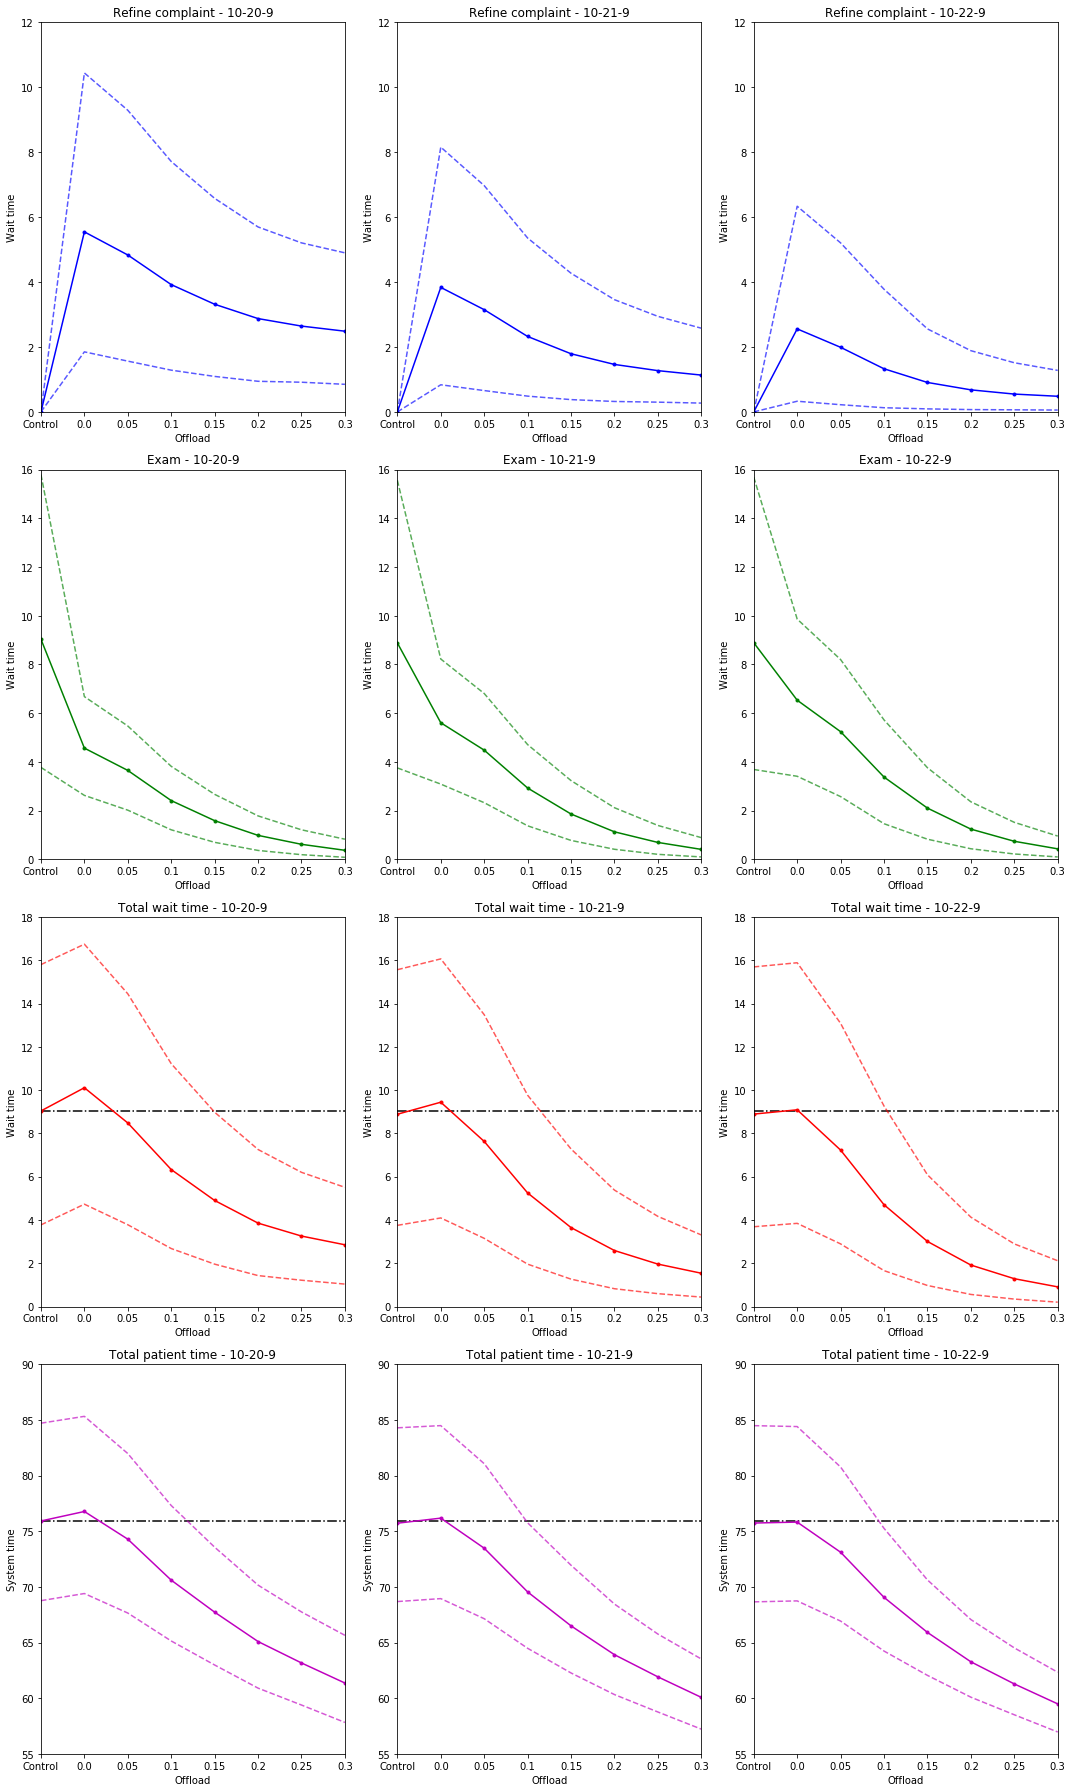

In [812]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(figsize = (15, 25), ncols = 3, nrows = 4)

# Plot means
for a in (ax7, ax8, ax9) :
    a.axhline(control_mean_total_wait, c = 'k', ls = '-.')
for a in (ax10, ax11, ax12) :
    a.axhline(control_mean_total_time, c = 'k', ls = '-.')

# 10-20-9
staff_10209 = '10-20-9'
waits_mean.loc[staff_10209]['Mean_wait_time_refine_complaint'].plot(ax = ax1, color = 'b', style = '.-')
waits_95.loc[staff_10209]['Mean_wait_time_refine_complaint'].plot(ax = ax1, label = None, ls = '--', color = 'b', alpha = 0.65)
waits_05.loc[staff_10209]['Mean_wait_time_refine_complaint'].plot(ax = ax1, label = None, ls = '--', color = 'b', alpha = 0.65)
waits_mean.loc[staff_10209]['Mean_wait_time_exam'].plot(ax = ax4, color = 'g', style = '.-')
waits_95.loc[staff_10209]['Mean_wait_time_exam'].plot(ax = ax4, label = None, ls = '--', color = 'g', alpha = 0.65)
waits_05.loc[staff_10209]['Mean_wait_time_exam'].plot(ax = ax4, label = None, ls = '--', color = 'g', alpha = 0.65)
waits_mean.loc[staff_10209]['FS_Step_wait'].plot(ax = ax7, color = 'r', style = '.-')
waits_95.loc[staff_10209]['FS_Step_wait'].plot(ax = ax7, label = None, ls = '--', color = 'r', alpha = 0.65)
waits_05.loc[staff_10209]['FS_Step_wait'].plot(ax = ax7, label = None, ls = '--', color = 'r', alpha = 0.65)
waits_mean.loc[staff_10209]['Total_system_time'].plot(ax = ax10, color = 'm', style = '.-')
waits_95.loc[staff_10209]['Total_system_time'].plot(ax = ax10, label = None, ls = '--', color = 'm', alpha = 0.65)
waits_05.loc[staff_10209]['Total_system_time'].plot(ax = ax10, label = None, ls = '--', color = 'm', alpha = 0.65)
ax1.set_ylim(0, 12)
ax4.set_ylim(0, 16)
ax7.set_ylim(0, 18)
ax10.set_ylim(55, 90)
ax1.set_ylabel('Wait time')
ax4.set_ylabel('Wait time')
ax7.set_ylabel('Wait time')
ax10.set_ylabel('System time')
ax1.set_title('Refine complaint - ' + staff_10209)
ax4.set_title('Exam - ' + staff_10209)
ax7.set_title('Total wait time - ' + staff_10209)
ax10.set_title('Total patient time - ' + staff_10209)
# 10-21-9
staff_10219 = '10-21-9'
waits_mean.loc[staff_10219]['Mean_wait_time_refine_complaint'].plot(ax = ax2, color = 'b', style = '.-')
waits_95.loc[staff_10219]['Mean_wait_time_refine_complaint'].plot(ax = ax2, label = None, ls = '--', color = 'b', alpha = 0.65)
waits_05.loc[staff_10219]['Mean_wait_time_refine_complaint'].plot(ax = ax2, label = None, ls = '--', color = 'b', alpha = 0.65)
waits_mean.loc[staff_10219]['Mean_wait_time_exam'].plot(ax = ax5, color = 'g', style = '.-')
waits_95.loc[staff_10219]['Mean_wait_time_exam'].plot(ax = ax5, label = None, ls = '--', color = 'g', alpha = 0.65)
waits_05.loc[staff_10219]['Mean_wait_time_exam'].plot(ax = ax5, label = None, ls = '--', color = 'g', alpha = 0.65)
waits_mean.loc[staff_10219]['FS_Step_wait'].plot(ax = ax8, color = 'r', style = '.-')
waits_95.loc[staff_10219]['FS_Step_wait'].plot(ax = ax8, label = None, ls = '--', color = 'r', alpha = 0.65)
waits_05.loc[staff_10219]['FS_Step_wait'].plot(ax = ax8, label = None, ls = '--', color = 'r', alpha = 0.65)
waits_mean.loc[staff_10219]['Total_system_time'].plot(ax = ax11, color = 'm', style = '.-')
waits_95.loc[staff_10219]['Total_system_time'].plot(ax = ax11, label = None, ls = '--', color = 'm', alpha = 0.65)
waits_05.loc[staff_10219]['Total_system_time'].plot(ax = ax11, label = None, ls = '--', color = 'm', alpha = 0.65)
ax2.set_ylim(0, 12)
ax5.set_ylim(0, 16)
ax8.set_ylim(0, 18)
ax11.set_ylim(55, 90)
ax2.set_ylabel('Wait time')
ax5.set_ylabel('Wait time')
ax8.set_ylabel('Wait time')
ax11.set_ylabel('System time')
ax2.set_title('Refine complaint - ' + staff_10219)
ax5.set_title('Exam - ' + staff_10219)
ax8.set_title('Total wait time - ' + staff_10219)
ax11.set_title('Total patient time - ' + staff_10219)
# 10-22-9
staff_10229 = '10-22-9'
waits_mean.loc[staff_10229]['Mean_wait_time_refine_complaint'].plot(ax = ax3, color = 'b', style = '.-')
waits_95.loc[staff_10229]['Mean_wait_time_refine_complaint'].plot(ax = ax3, label = None, ls = '--', color = 'b', alpha = 0.65)
waits_05.loc[staff_10229]['Mean_wait_time_refine_complaint'].plot(ax = ax3, label = None, ls = '--', color = 'b', alpha = 0.65)
waits_mean.loc[staff_10229]['Mean_wait_time_exam'].plot(ax = ax6, color = 'g', style = '.-')
waits_95.loc[staff_10229]['Mean_wait_time_exam'].plot(ax = ax6, label = None, ls = '--', color = 'g', alpha = 0.65)
waits_05.loc[staff_10229]['Mean_wait_time_exam'].plot(ax = ax6, label = None, ls = '--', color = 'g', alpha = 0.65)
waits_mean.loc[staff_10229]['FS_Step_wait'].plot(ax = ax9, color = 'r', style = '.-')
waits_95.loc[staff_10229]['FS_Step_wait'].plot(ax = ax9, label = None, ls = '--', color = 'r', alpha = 0.65)
waits_05.loc[staff_10229]['FS_Step_wait'].plot(ax = ax9, label = None, ls = '--', color = 'r', alpha = 0.65)
waits_mean.loc[staff_10229]['Total_system_time'].plot(ax = ax12, color = 'm', style = '.-')
waits_95.loc[staff_10229]['Total_system_time'].plot(ax = ax12, label = None, ls = '--', color = 'm', alpha = 0.65)
waits_05.loc[staff_10229]['Total_system_time'].plot(ax = ax12, label = None, ls = '--', color = 'm', alpha = 0.65)
ax3.set_ylim(0, 12)
ax6.set_ylim(0, 16)
ax9.set_ylim(0, 18)
ax12.set_ylim(55, 90)
ax3.set_ylabel('Wait time')
ax6.set_ylabel('Wait time')
ax9.set_ylabel('Wait time')
ax12.set_ylabel('System time')
ax3.set_title('Refine complaint - ' + staff_10229)
ax6.set_title('Exam - ' + staff_10229)
ax9.set_title('Total wait time - ' + staff_10229)
ax12.set_title('Total patient time - ' + staff_10229)

plt.tight_layout()
plt.show()

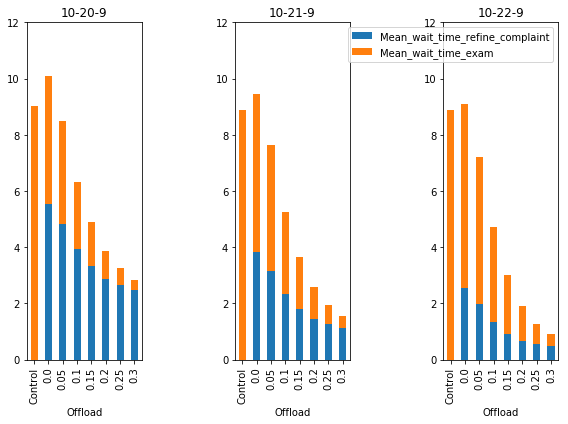

In [788]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (8, 6))
waits_mean.loc[staff_10209][['Mean_wait_time_refine_complaint', 'Mean_wait_time_exam']].plot(kind = 'bar', stacked = True, ax = ax1, legend = False)
waits_mean.loc[staff_10219][['Mean_wait_time_refine_complaint', 'Mean_wait_time_exam']].plot(kind = 'bar', stacked = True, ax = ax2, legend = False)
waits_mean.loc[staff_10229][['Mean_wait_time_refine_complaint', 'Mean_wait_time_exam']].plot(kind = 'bar', stacked = True, ax = ax3, legend = False)
ax1.set_title(staff_10209)
ax2.set_title(staff_10219)
ax3.set_title(staff_10229)
ax1.set_ylim(0, 12)
ax2.set_ylim(0, 12)
ax3.set_ylim(0, 12)
plt.legend()
plt.tight_layout()
plt.show()

In [794]:
waits_mean['%_RC_Wait'] = waits_mean['Mean_wait_time_refine_complaint'] / waits_mean['FS_Step_wait']
waits_mean['%_EX_Wait'] = waits_mean['Mean_wait_time_exam'] / waits_mean['FS_Step_wait']

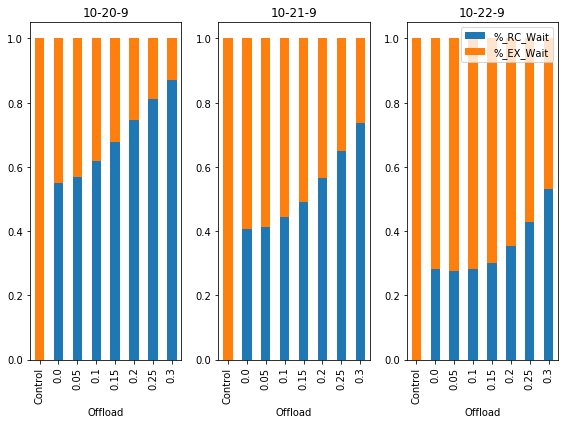

In [796]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (8, 6))
waits_mean.loc[staff_10209][['%_RC_Wait', '%_EX_Wait']].plot(kind = 'bar', stacked = True, ax = ax1, legend = False)
waits_mean.loc[staff_10219][['%_RC_Wait', '%_EX_Wait']].plot(kind = 'bar', stacked = True, ax = ax2, legend = False)
waits_mean.loc[staff_10229][['%_RC_Wait', '%_EX_Wait']].plot(kind = 'bar', stacked = True, ax = ax3, legend = False)
ax1.set_title(staff_10209)
ax2.set_title(staff_10219)
ax3.set_title(staff_10229)
plt.legend()
plt.tight_layout()
plt.show()

In [754]:
patient_journey = ['Mean_wait_time_check_in', 'Mean_serve_time_check_in', 'Mean_wait_time_refine_complaint', 'Mean_serve_time_refine_complaint', 'Mean_wait_time_exam', 'Mean_serve_time_exam_flow_staff', 'Mean_wait_time_follow_up', 'Mean_serve_time_follow_up','Mean_wait_time_checkout', 'Mean_serve_time_checkout']

In [755]:
control_journey = ['Mean_wait_time_check_in', 'Mean_serve_time_check_in', 'Mean_wait_time_refine_complaint', 'Mean_serve_time_refine_complaint', 'Mean_wait_time_exam', 'Mean_serve_time_exam', 'Mean_wait_time_follow_up', 'Mean_serve_time_follow_up','Mean_wait_time_checkout', 'Mean_serve_time_checkout']

In [756]:
df_patient_journey = data.groupby(['Staffing', 'Offload'])[patient_journey].mean().T

In [757]:
df_patient_journey.loc['Total_time'] = df_patient_journey.sum()

In [758]:
df_patient_journey

Staffing                         10-20-9                                      \
Offload                          Control   0.0  0.05   0.1  0.15   0.2  0.25   
Mean_wait_time_check_in             0.00  0.00  0.00  0.00  0.00  0.00  0.00   
Mean_serve_time_check_in            2.51  2.51  2.51  2.51  2.51  2.51  2.51   
Mean_wait_time_refine_complaint     0.00  5.55  4.83  3.92  3.32  2.87  2.64   
Mean_serve_time_refine_complaint   24.67 24.50 24.50 24.53 24.53 24.51 24.53   
Mean_wait_time_exam                 9.04  4.56  3.65  2.41  1.58  0.98  0.61   
Mean_serve_time_exam_flow_staff      nan 29.04 29.05 29.03 29.07 29.05 29.06   
Mean_wait_time_follow_up            0.00  0.00  0.00  0.00  0.00  0.00  0.00   
Mean_serve_time_follow_up           5.24  5.24  5.25  5.25  5.25  5.24  5.25   
Mean_wait_time_checkout             0.01  0.01  0.01  0.01  0.01  0.01  0.02   
Mean_serve_time_checkout            5.37  5.37  5.37  5.37  5.37  5.38  5.37   
Total_time                         46.84 76.77 75.18 73.04 71.64 70.56 70.00   

Staffing                               10-21-9        ...             10-22-9  \
Offload                            0.3 Control   0.0  ...  0.25   0.3 Control   
Mean_wait_time_check_in           0.00    0.00  0.00  ...  0.00  0.00    0.00   
Mean_serve_time_check_in          2.51    2.51  2.51  ...  2.51  2.51    2.51   
Mean_wait_time_refine_complaint   2.49    0.00  3.84  ...  1.27  1.13    0.00   
Mean_serve_time_refine_complaint 24.55   24.67 24.54  ... 24.58 24.58   24.66   
Mean_wait_time_exam               0.37    8.88  5.61  ...  0.69  0.40    8.89   
Mean_serve_time_exam_flow_staff  29.06     nan 29.06  ... 29.06 29.06     nan   
Mean_wait_time_follow_up          0.00    0.00  0.00  ...  0.00  0.00    0.00   
Mean_serve_time_follow_up         5.25    5.24  5.24  ...  5.25  5.25    5.25   
Mean_wait_time_checkout           0.02    0.01  0.01  ...  0.02  0.02    0.01   
Mean_serve_time_checkout          5.37    5.37  5.37  ...  5.37  5.37    5.37   
Total_time                       69.62   46.68 76.18  ... 68.75 68.33   46.68   

Staffing                                                                    
Offload                            0.0  0.05   0.1  0.15   0.2  0.25   0.3  
Mean_wait_time_check_in           0.00  0.00  0.00  0.00  0.00  0.00  0.00  
Mean_serve_time_check_in          2.51  2.51  2.51  2.51  2.51  2.51  2.51  
Mean_wait_time_refine_complaint   2.56  1.99  1.33  0.91  0.68  0.55  0.48  
Mean_serve_time_refine_complaint 24.56 24.57 24.59 24.60 24.60 24.62 24.62  
Mean_wait_time_exam               6.53  5.24  3.37  2.10  1.24  0.74  0.42  
Mean_serve_time_exam_flow_staff  29.04 29.07 29.06 29.07 29.09 29.06 29.07  
Mean_wait_time_follow_up          0.00  0.00  0.00  0.00  0.00  0.00  0.00  
Mean_serve_time_follow_up         5.24  5.25  5.24  5.24  5.24  5.25  5.24  
Mean_wait_time_checkout           0.01  0.01  0.01  0.01  0.02  0.02  0.02  
Mean_serve_time_checkout          5.37  5.37  5.38  5.38  5.37  5.38  5.37  
Total_time                       75.82 74.00 71.50 69.82 68.74 68.12 67.74  

[11 rows x 24 columns]

In [759]:
data.loc[data['Offload'] == 'Control']['Total_system_time'].mean()

75.79276097499697

In [760]:
data.loc[data['Offload'] == 'Control'][control_journey].mean().sum()

75.79276097493775